## DATA PREPARATION

### Import important python libraries for Data Science

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option("display.max_rows", 500) #  to display rows upto 500

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 890 entries, Province/State to 6/25/22
dtypes: float64(2), int64(886), object(2)
memory usage: 1.9+ MB


In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/16/22', '6/17/22', '6/18/22', '6/19/22', '6/20/22', '6/21/22',
       '6/22/22', '6/23/22', '6/24/22', '6/25/22'],
      dtype='object', length=886)

In [6]:
time_idx= pd_raw.columns[4:] # extracted all coloums after 4th column in a new column

In [7]:
pd_raw[time_idx].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,0,0,0,0,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,0,0,0,0,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,0,0,0,0,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,0,0,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,0,0,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [9]:
df_plot = pd.DataFrame({'date':time_idx}) # extracted all dates coloum in a new dataframe using dictionary

In [10]:
df_plot

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
881,6/21/22
882,6/22/22
883,6/23/22
884,6/24/22


In [11]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [12]:
pd_raw[pd_raw['Country/Region'] == 'US'].iloc[:,4:] #extracted US Covid-19 US data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
257,1,1,2,2,5,5,5,6,6,8,...,86058228,86216418,86230982,86246101,86297081,86452232,86636306,86757621,86909716,86949088


In [13]:
pd_raw[pd_raw['Country/Region'] == 'US'].iloc[:,4:].sum(axis=0) #for multiple US column, all the covid cases gets accumulated at in one single row

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
6/21/22    86452232
6/22/22    86636306
6/23/22    86757621
6/24/22    86909716
6/25/22    86949088
Length: 886, dtype: int64

In [14]:
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'India',
               ]
# selected some list of countries of our interest for future evaluation.

In [15]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4:].sum(axis=0))

# accumulated total no. of covid cases against each date for all the countries in the country list.
# np.array is used here for creating matrix (check it later for proper reasoning)

In [16]:
df_plot

,date,Italy,US,Spain,Germany,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0
...,...,...,...,...,...,...
881,6/21/22,17959329,86452232,12613634,27454225,43331645
882,6/22/22,18014202,86636306,12613634,27573585,43344958
883,6/23/22,18071634,86757621,12613634,27681775,43362294
884,6/24/22,18128044,86909716,12681820,27771111,43378234


In [17]:
%matplotlib inline
df_plot.set_index('date')

,Italy,US,Spain,Germany,India
date,,,,,
1/22/20,0,1,0,0,0
1/23/20,0,1,0,0,0
1/24/20,0,2,0,0,0
1/25/20,0,2,0,0,0
1/26/20,0,5,0,0,0
...,...,...,...,...,...
6/21/22,17959329,86452232,12613634,27454225,43331645
6/22/22,18014202,86636306,12613634,27573585,43344958
6/23/22,18071634,86757621,12613634,27681775,43362294


In [18]:
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


<AxesSubplot:>

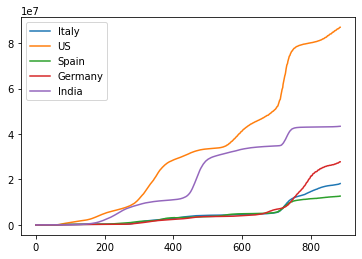

In [19]:
df_plot.plot()

In [20]:
time_idx = [datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

# changing the date format from MM-DD-YYYY to YYYY-MM-DD for better understanding of data

In [21]:
df_plot['date'] = time_str
type(df_plot['date'][0])

# implemented the change in date format to the dataframe we have saved earlier.

str

In [22]:
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [23]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep = ';', index = False)

### Relational data model


In [24]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [25]:
pd_data_base = pd_raw.rename(columns = {'Country/Region': 'country',
                                       'Province/State': 'state'}) # renaming column names for our better understanding.

In [26]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis= 1) # dropping unnecessary data columns from the dataframe.
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181465,181534,181574,181666,181725,181808,181912,181987,182033,182072
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276821,277141,277141,277409,277444,277663,277940,278211,278504,278793
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265964,265968,265971,265975,265985,265993,266006,266015,266025,266030
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43774,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [27]:
test_pd = pd_data_base.set_index(['state', 'country']) # Extracted 2 columns for multi-indexing
test_pd.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
NaN   Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  6/16/22  6/17/22  \
state country                                          ...                     
NaN   Afghanistan        0        0        0        0  ...   181465   181534   
      Albania            0        0        0        0  ...   276821   277141   
      Algeria            0        0        0        0  ...   265964   265968   
      Andorra            0        0        0        0  ...    43449    43449   
      Angola             0        0        0        0  ...    99761    99761   

                   6/18/22  6/19/22  6/20/22  6/21/22  6/22/22  6/23/22  \
state country                                                             
NaN   Afghanistan   181574   181666   181725   181808   181912   181987   
      Albania       277141   277409   277444   277663   277940   278211   
      Algeria       265971   265975   265985   265993   266006   266015   
      Andorra        43449    43449    43449    43449    43774    43774   
      Angola         99761    99761    99761    99761    99761    99761   

                   6/24/22  6/25/22  
state country                        
NaN   Afghanistan   182033   182072  
      Albania       278504   278793  
      Algeria       266025   266030  
      Andorra        43774    43774  
      Angola         99761    99761  

[5 rows x 886 columns]

In [28]:
test_pd= test_pd.T # Transpose of the dataframe
test_pd.head()

state           NaN                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   

state    ...     NaN                                                          \
country  ... Uruguay Uzbekistan Vanuatu Venezuela Vietnam West Bank and Gaza   
1/22/20  ...       0          0       0         0       0                  0   
1/23/20  ...       0          0       0         0       2                  0   
1/24/20  ...       0          0       0         0       2                  0   
1/25/20  ...       0          0       0         0       2                  0   
1/26/20  ...       0          0       0         0       2                  0   

state                                               
country Winter Olympics 2022 Yemen Zambia Zimbabwe  
1/22/20                    0     0      0        0  
1/23/20                    0     0      0        0  
1/24/20                    0     0      0        0  
1/25/20                    0     0      0        0  
1/26/20                    0     0      0        0  

[5 rows x 285 columns]

In [29]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [30]:
pd_relational_test = test_pd.stack(level= [0,1]).reset_index()

In [31]:
pd_relational_test # stacking done for better understanding of the data

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
252505,6/25/22,Western Australia,Australia,884323.0
252506,6/25/22,Xinjiang,China,1008.0
252507,6/25/22,Yukon,Canada,4453.0
252508,6/25/22,Yunnan,China,2173.0


In [32]:
pd_relational_model = pd_relational_test.rename(columns = {'level_0': 'date', 0: 'confirmed'}) # renaming of the column

In [33]:
pd_relational_model.set_index('date')

,state,country,confirmed
date,,,
1/22/20,NaN,Afghanistan,0.0
1/22/20,NaN,Albania,0.0
1/22/20,NaN,Algeria,0.0
1/22/20,NaN,Andorra,0.0
1/22/20,NaN,Angola,0.0
...,...,...,...
6/25/22,Western Australia,Australia,884323.0
6/25/22,Xinjiang,China,1008.0
6/25/22,Yukon,Canada,4453.0


In [34]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [35]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [36]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [37]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';', index = False)

# Data Understanding EDA

# Group-by apply

In [60]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';', parse_dates = [0])


In [61]:
pd_JH_data = pd_JH_data.sort_values('date', ascending = True).reset_index(drop = True).copy()
pd_JH_data

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0
...,...,...,...,...
252505,2022-06-25,no,Andorra,43774.0
252506,2022-06-25,no,Algeria,266030.0
252507,2022-06-25,no,Albania,278793.0
252508,2022-06-25,no,Argentina,9341492.0


In [62]:
test_data = pd_JH_data[((pd_JH_data['country'] == 'US')|
                      (pd_JH_data['country'] == 'Germany'))&
                     ((pd_JH_data['date']> '2020-03-20'))]
                     

In [63]:
test_data.tail()

,date,state,country,confirmed
251751,2022-06-23,no,US,86757621.0
251980,2022-06-24,no,Germany,27771111.0
252029,2022-06-24,no,US,86909716.0
252264,2022-06-25,no,Germany,27771112.0
252326,2022-06-25,no,US,86949088.0


In [64]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2022-06-25,no,27771112.0
US,2022-06-25,no,86949088.0


In [ ]:
 %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept = True)

def get_doubling_time_via_regression(in_array):
    '''Using a linear regression to approximate the doubling rate''' 
    
    # y = np.array(in_array['confirmed'])
    # X = np.arange(len(y)).reshape(-1,1)
    
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1,1) 
    
    # assert len(in_array) == 3
    reg.fit(X,y)
    intercept = reg.intercept_
    slope = reg.coef_
    
    return intercept/slope


if __name__ == '__main__':
    test_data2 = np.array([2,4,6])
    result = get_doubling_time_via_regression(test_data2)
    print('The test slope is:' + str(result))

In [74]:
test_data.groupby(['state','country']).agg(np.max)

date   confirmed
state country                       
no    Germany 2022-06-25  27771112.0
      US      2022-06-25  86949088.0

In [75]:
test_data.groupby(['state', 'country']).apply(get_doubling_time_via_regression)

state  country
no     Germany    [-191.7147040859743]
       US         [-98.96057042260661]
dtype: object

In [81]:
def rolling_reg(df_input,col='confirmed'):
    '''input has to be a data frame'''
    '''return is a single series (mandatory for group by apply)'''
    
    days_back = 3
    result = df_input[col].rolling(
                window = days_back,
                min_periods = days_back).apply(get_doubling_time_via_regression,raw = False)
    return result

In [82]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country        
no     Germany  16854            NaN
                17139            NaN
                17424       6.427510
                17709       5.190573
                17994       6.129400
                             ...    
       US       251174    837.640187
                251473    509.761209
                251751    567.246275
                252029    634.708906
                252326    907.437226
Name: confirmed, Length: 1654, dtype: float64

In [83]:
test_data

,date,state,country,confirmed
16854,2020-03-21,no,Germany,16662.0
16904,2020-03-21,no,US,26025.0
17139,2020-03-22,no,Germany,18610.0
17189,2020-03-22,no,US,34944.0
17424,2020-03-23,no,Germany,22672.0
...,...,...,...,...
251751,2022-06-23,no,US,86757621.0
251980,2022-06-24,no,Germany,27771111.0
252029,2022-06-24,no,US,86909716.0
252264,2022-06-25,no,Germany,27771112.0


In [85]:
pd_DR_result = pd_JH_data[['state', 'country', 'confirmed']].groupby(['state', 'country']).apply(rolling_reg, 'confirmed').reset_index()

In [86]:
pd_DR_result = pd_DR_result.rename(columns = {'confirmed': 'confirmed_DR',
                              'level_2' : 'index'})

pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,499,NaN
2,Alberta,Canada,762,NaN
3,Alberta,Canada,1069,NaN
4,Alberta,Canada,1333,NaN


In [87]:
pd_JH_data = pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0.0
1,1,2020-01-22,no,Kosovo,0.0
2,2,2020-01-22,no,Kuwait,0.0
3,3,2020-01-22,no,Kyrgyzstan,0.0
4,4,2020-01-22,no,Laos,0.0


In [90]:
pd_result_large = pd.merge(pd_JH_data, pd_DR_result[['index', 'confirmed_DR']], on = ['index'], how = 'left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0.0,NaN
1,1,2020-01-22,no,Kosovo,0.0,NaN
2,2,2020-01-22,no,Kuwait,0.0,NaN
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN
4,4,2020-01-22,no,Laos,0.0,NaN


In [91]:

pd_result_large[pd_result_large['country']=='Germany']

,index,date,state,country,confirmed,confirmed_DR
41,41,2020-01-22,no,Germany,0.0,NaN
323,323,2020-01-23,no,Germany,0.0,NaN
609,609,2020-01-24,no,Germany,0.0,NaN
895,895,2020-01-25,no,Germany,0.0,NaN
1179,1179,2020-01-26,no,Germany,0.0,NaN
...,...,...,...,...,...,...
251124,251124,2022-06-21,no,Germany,27454225.0,225.591693
251409,251409,2022-06-22,no,Germany,27573585.0,230.135693
251695,251695,2022-06-23,no,Germany,27681775.0,242.319153
251980,251980,2022-06-24,no,Germany,27771111.0,280.221240


# Filtering the data with group-by apply

In [92]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [93]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [94]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_large.head()


,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0
1,1,2020-01-22,no,Kosovo,0.0,NaN,0.0
2,2,2020-01-22,no,Kuwait,0.0,NaN,0.0
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0
4,4,2020-01-22,no,Laos,0.0,NaN,0.0


# Filtered doubling rate

In [95]:
pd_filtered_doubling=pd_result_large[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
252505,no,Zimbabwe,251226,3753.702504
252506,no,Zimbabwe,251439,2861.453797
252507,no,Zimbabwe,251746,2586.681542
252508,no,Zimbabwe,251988,2556.585170
252509,no,Zimbabwe,252509,2454.311538


In [96]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_large.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
252505,252505,2022-06-25,no,Andorra,43774.0,inf,43839.0,6.734462e+02
252506,252506,2022-06-25,no,Algeria,266030.0,3.546978e+04,266032.4,2.860463e+04
252507,252507,2022-06-25,no,Albania,278793.0,9.570538e+02,278787.0,9.862061e+02
252508,252508,2022-06-25,no,Argentina,9341492.0,inf,9341492.0,-3.343450e+15
252509,252509,2022-06-25,no,Zimbabwe,255309.0,2.950882e+03,255352.4,2.454312e+03


In [97]:
mask=pd_result_large['confirmed']>100
pd_result_large['confirmed_filtered_DR']=pd_result_large['confirmed_filtered_DR'].where(mask, other=np.NaN)

In [98]:
pd_result_large[pd_result_large['country']=='Germany'].tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
251124,251124,2022-06-21,no,Germany,27454225.0,225.591693,27451294.8,323.651057
251409,251409,2022-06-22,no,Germany,27573585.0,230.135693,27563137.8,265.017956
251695,251695,2022-06-23,no,Germany,27681775.0,242.319153,27650361.6,276.841054
251980,251980,2022-06-24,no,Germany,27771111.0,280.221240,27733491.6,324.606754
252264,252264,2022-06-25,no,Germany,27771112.0,621.049121,27816621.6,333.615922


In [99]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)